In [1]:
import arff
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

/Users/ashimjyotinath/miniforge3/envs/ps/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_breast = arff.load(open('/Users/ashimjyotinath/PhD Papers/PhD Obj 1/Datasets/Breast.arff'))
data_lung = arff.load(open('/Users/ashimjyotinath/PhD Papers/PhD Obj 1/Datasets/Lung.arff'))
data_cns = arff.load(open('/Users/ashimjyotinath/PhD Papers/PhD Obj 1/Datasets/CNS.arff'))
data_ovn = arff.load(open('/Users/ashimjyotinath/PhD Papers/PhD Obj 1/Datasets/Ovarian.arff'))

In [3]:
#Breast
breast_attributes = data_breast['attributes']
breast_instances = data_breast['data']
#Lung
lung_attributes = data_lung['attributes']
lung_instances = data_lung['data']
#CNS
cns_attributes = data_cns['attributes']
cns_instances = data_cns['data']
#Overian
ovn_attributes = data_ovn['attributes']
ovn_instances = data_ovn['data']

In [4]:
# Extract attribute names and data instances
attribute_names = [attr[0] for attr in data_breast['attributes']]
instances = data_breast['data']

# Create a DataFrame from the data instances
df = pd.DataFrame(instances, columns=attribute_names)

# Optional: Convert attribute types if needed
# df['attribute_name'] = df['attribute_name'].astype('desired_type')

# Print the resulting DataFrame
print(df)

    Contig45645_RC  Contig44916_RC  D25272  J00129  Contig29982_RC  \
0           -0.299           0.093  -0.215  -0.566          -0.596   
1           -0.081           0.009  -0.091  -0.518          -0.502   
2           -0.125           0.070  -0.006  -0.575          -0.585   
3           -0.270           0.123   0.056  -0.499          -0.402   
4           -0.141           0.025  -0.031  -0.465          -0.533   
..             ...             ...     ...     ...             ...   
92           1.058          -0.037   0.053  -0.667           0.198   
93           0.105           0.021   0.022  -0.527          -0.286   
94          -0.167          -0.047  -0.146  -0.607          -0.482   
95          -0.195          -0.097  -0.153  -0.731          -0.432   
96           0.182          -0.081  -0.133  -0.731          -0.092   

    Contig26811  D25274  Contig36292  Contig42854  Contig34839  ...  \
0        -0.195   0.039       -0.409       -0.352        0.066  ...   
1        -0.149  

In [5]:
data_b = df  # DataFrame with gene columns and 'Class' column

# Separate the features (gene columns) and the class labels
X = data_b.iloc[:, :-1]  # Features (gene columns)
y = data_b.iloc[:, -1]   # Class labels

# Calculate Fisher score (F-value) for each gene
f_scores, _ = f_classif(X, y)

# Create a SelectKBest instance to select the top 1000 genes
k_best = SelectKBest(score_func=f_classif, k=1000)
X_new = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected genes
selected_genes = X.columns[selected_indices]

# Create a new DataFrame with the selected genes and the class column
selected_data = data_b[selected_genes]
selected_data['type'] = y

# Print the selected genes and their Fisher scores
for gene, score in zip(selected_genes, f_scores[selected_indices]):
    print(f"Gene: {gene}\tFisher Score: {score}")


Gene: Contig49388_RC	Fisher Score: 10.775301423085658
Gene: Contig42006_RC	Fisher Score: 12.958126561085466
Gene: Contig53047_RC	Fisher Score: 7.170715291262089
Gene: AB033007	Fisher Score: 11.483620942257495
Gene: AB033032	Fisher Score: 15.735280438562881
Gene: AB033043	Fisher Score: 11.11491003034782
Gene: Contig26077_RC	Fisher Score: 7.173895299803699
Gene: U45975	Fisher Score: 15.96376803913921
Gene: NM_003016	Fisher Score: 7.137655592894911
Gene: Contig52554_RC	Fisher Score: 7.951584851377076
Gene: NM_003022	Fisher Score: 8.879066282987928
Gene: NM_002300	Fisher Score: 9.043888542404492
Gene: NM_003039	Fisher Score: 8.576126361931262
Gene: NM_003044	Fisher Score: 7.615786592912207
Gene: AL035297	Fisher Score: 10.800735582748215
Gene: NM_001607	Fisher Score: 9.554289279278471
Gene: NM_001609	Fisher Score: 9.706738075247282
Gene: NM_001618	Fisher Score: 9.154680915031312
Gene: NM_003079	Fisher Score: 6.716397923003957
Gene: NM_002357	Fisher Score: 6.692148359559745
Gene: NM_002358	F

/Users/ashimjyotinath/miniforge3/envs/ps/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   56   121   210   358   642   755   776   824   889   942  1083  1193
  1204  1261  1299  1374  1388  1547  1736  1747  1985  2045  2205  2298
  2333  2370  2402  2453  2702  3019  3294  3363  3477  3481  3539  3577
  3655  3797  3836  3857  3910  4005  4400  4407  4423  4436  4491  4513
  4602  4673  4788  4947  5003  5010  5097  5190  5254  5260  5295  5449
  5495  5578  5645  5666  5810  5820  5893  5915  5949  6085  6092  6266
  6357  6387  6478  6652  6813  6920  7054  7075  7218  7232  7299  7359
  7371  7468  7502  7535  7593  7643  7712  7868  7879  7899  7905  7913
  7958  7993  7996  8176  8530  8574  8760  8872  9039  9117  9169  9486
  9528  9543  9550  9587  9623  9648  9935  9987 10066 10125 10195 10199
 10235 10340 10344 10351 10372 10430 10479 10482 10493 10498 10713 10789
 10852 10865 10927 10944 10952 11162 11173 11198 1

In [6]:
df=selected_data

In [7]:
df

,Contig49388_RC,Contig42006_RC,Contig53047_RC,AB033007,AB033032,AB033043,Contig26077_RC,U45975,NM_003016,Contig52554_RC,...,NM_018964,NM_018965,Contig9355_RC,NM_000858,Contig56093_RC,Contig46991_RC,NM_000884,NM_000889,NM_000895,type
0,0.383,0.021,-1.082,0.363,-0.230,-0.133,0.006,-0.467,0.045,0.053,...,0.067,0.081,0.213,-0.088,0.158,0.242,-0.261,0.068,-0.053,relapse
1,-0.205,-0.182,-0.985,0.320,-0.092,0.171,-0.172,-0.239,-0.085,-0.036,...,-0.150,0.104,0.320,0.129,0.009,0.115,-0.143,-0.030,-0.180,relapse
2,0.194,-0.055,-1.082,0.208,0.113,0.022,-0.073,0.107,0.064,0.071,...,0.247,0.046,0.239,-0.029,-0.016,0.196,-0.267,0.031,0.180,relapse
3,-0.310,0.127,0.346,-0.037,0.030,-0.092,-0.328,-0.664,0.111,-0.043,...,-0.416,-0.474,0.010,0.172,-0.281,-0.057,-0.413,-0.060,-0.349,relapse
4,0.062,-0.216,-1.122,0.037,-0.057,0.065,-0.190,0.062,0.080,-0.016,...,-0.211,-0.155,-0.039,-0.169,-0.127,-0.008,-0.155,-0.043,0.132,relapse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.061,0.010,-1.124,-0.054,-0.054,-0.006,0.320,-0.063,-0.096,0.092,...,0.022,0.223,0.004,-0.131,0.157,0.129,-0.135,-0.001,-0.130,non-relapse
93,-0.087,0.095,-1.080,-0.080,-0.064,0.044,-0.095,-0.345,0.066,0.100,...,0.187,0.019,0.034,0.207,0.074,0.022,0.358,0.195,0.054,non-relapse
94,-0.021,0.056,-1.110,0.000,-0.198,-0.024,-0.086,-0.212,-0.083,-0.004,...,-0.040,0.238,0.077,0.013,0.334,0.108,0.207,0.052,0.126,non-relapse
95,-0.185,-0.026,-0.899,-0.149,-0.099,-0.123,-0.114,-0.606,0.076,0.014,...,-0.402,-0.515,0.132,-0.122,-0.273,-0.306,-0.105,0.086,0.330,non-relapse


### HybridSPEA2GWOABC

Optimizing Hybrid_SPEA2GWOABC:  70%|▋| 14/20 [7:48:39<3:20:51, 2008.55s/iteratio

Early stopping triggered


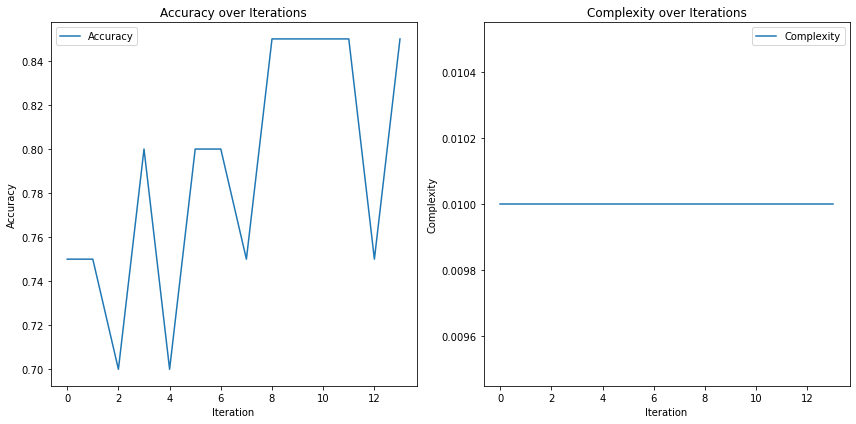

##############################################################################

Best Results:
Best Accuracy: 0.85
Best Robustness: 0.09999999999999999
Best Complexity: 0.01
Best Weighted Complexity Score: 0.003
##############################################################################
Best Validation Accuracy with top 100 features: 0.8500
Best Validation Robustness (Std Dev of CV scores): 0.1000
Best Complexity (1/Number of Features): 0.0100
Best Interpretability (Same as Complexity here): 0.0100
##############################################################################

Selected top features for the best result:
NM_013409
NM_003422
NM_001661
Contig58301_RC
Contig44064_RC
NM_003639
NM_016444
NM_016095
NM_014364
NM_004504
AK001442
NM_017761
Contig51749_RC
AF077036
AB002324
AL133619
Contig46223_RC
NM_021204
NM_004418
NM_007184
NM_002300
NM_005017
AF055270
NM_000909
AL122091
NM_000884
NM_018271
D43950
NM_004580
NM_016096
NM_002358
AL133622
NM_003079
Contig16447_RC
NM_001866
NM_007

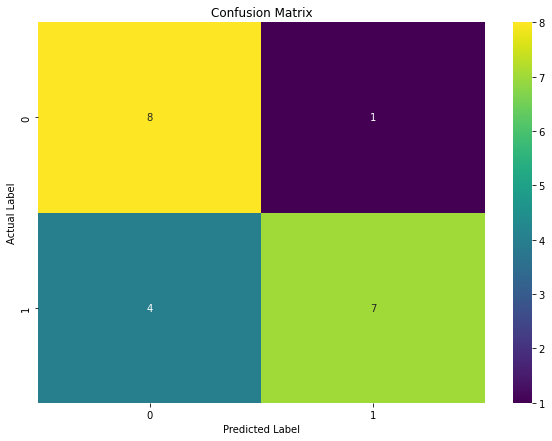

##############################################################################

Classification Report:
              precision    recall  f1-score   support

 non-relapse       0.67      0.89      0.76         9
     relapse       0.88      0.64      0.74        11

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20

##############################################################################
##############################################################################

Sensitivity Analysis (Impact of leaving out each feature):
Contig49388_RC: 0.7500
Contig42006_RC: 0.7000
Contig53047_RC: 0.7500
AB033007: 0.7000
AB033032: 0.7000
AB033043: 0.7000
Contig26077_RC: 0.7000
U45975: 0.7500
NM_003016: 0.7000
Contig52554_RC: 0.7000
NM_003022: 0.7000
NM_002300: 0.7500
NM_003039: 0.7500
NM_003044: 0.7000
AL035297: 0.7500
NM_001607: 0.7000
NM_001609: 0.7500
NM_001618: 0.7500
NM_003079:

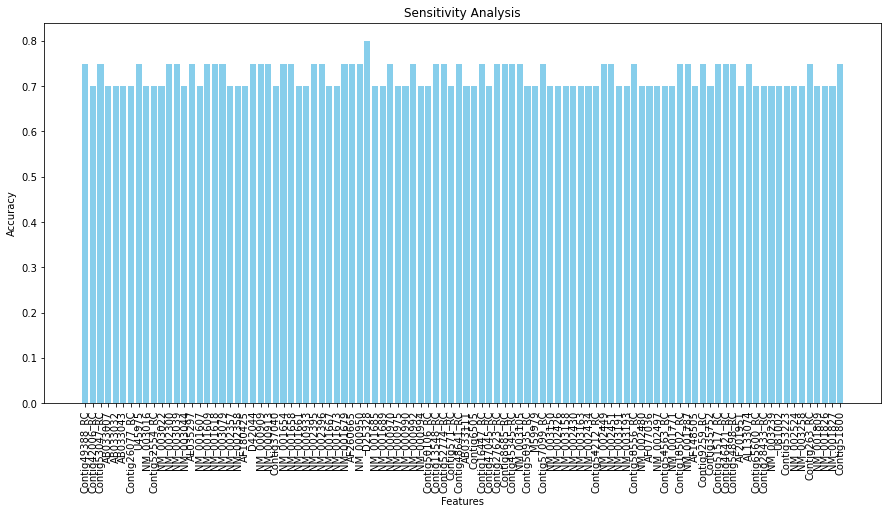

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import random

# Suppress warnings
warnings.filterwarnings('ignore')



def feature_evaluation(selected_columns, data, target, complexity_weight=1):
    X = data[selected_columns]
    y = target
    clf = KNeighborsClassifier()   # Using Random Forest classifier

    # Use StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, X, y, cv=skf)

    accuracy = np.mean(cv_scores)
    robustness = np.std(cv_scores)

    num_features = len(selected_columns)
    complexity = complexity_weight / num_features if num_features > 0 else float('inf')
    interpretability = complexity
    return (accuracy, robustness, complexity, interpretability)


def feature_evaluation_with_complexity_weight(selected_columns, data, target, complexity_weight):
    # Adjusts feature evaluation to give more importance to complexity
    accuracy, robustness, complexity, interpretability = feature_evaluation(selected_columns, data, target)
    weighted_complexity_score = complexity_weight * complexity
    return (accuracy, -robustness, weighted_complexity_score, interpretability)

# Fitness Function
def _fitness(individual, data, target, complexity_weight=0.3):
    selected_features = data.columns[individual == 1]
    return feature_evaluation(selected_features, data, target, complexity_weight)

def update_archive(archive, population, fitness, archive_size):
    # Combine the current archive and the new population
    combined = np.vstack((archive, population))
    combined_fitness = np.hstack((spea2_fitness_assignment(archive, data, target),
                                  spea2_fitness_assignment(population, data, target)))

    # Sort the combined array based on the fitness values
    sorted_indices = np.argsort(combined_fitness)
    updated_archive = combined[sorted_indices]

    # Keep only the top individuals up to the specified archive size
    if len(updated_archive) > archive_size:
        updated_archive = updated_archive[:archive_size]

    return updated_archive



# Grey Wolf Optimizer (GWO) Phase
def gwo_feature_evaluation(population, data, target, current_iter, max_iter):
    alpha, beta, delta = _find_leaders(population, data, target)
    a = 2 - 2 * (current_iter / max_iter)  

    for i in range(len(population)):
        wolf = population[i]
        for j in range(len(wolf)):
            r1, r2, r3 = np.random.rand(3)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = abs(C1 * alpha[j] - wolf[j])
            X1 = alpha[j] - A1 * D_alpha

            A2 = 2 * a * r3 - a
            C2 = 2 * r2
            D_beta = abs(C2 * beta[j] - wolf[j])
            X2 = beta[j] - A2 * D_beta

            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = abs(C3 * delta[j] - wolf[j])
            X3 = delta[j] - A3 * D_delta

            new_position = (X1 + X2 + X3) / 3
            population[i][j] = 1 if new_position > 0.5 else 0

# Find Leaders for GWO
def _find_leaders(population, data, target):
    fitness_values = np.array([_fitness(individual, data, target) for individual in population])
    sorted_indices = np.argsort(fitness_values[:, 0])[::-1]  # Sort based on accuracy
    alpha = population[sorted_indices[0]]
    beta = population[sorted_indices[1]]
    delta = population[sorted_indices[2]]
    return alpha, beta, delta

# SPEA2 Fitness Assignment
def spea2_fitness_assignment(population, data, target):
    fitness_values = np.array([feature_evaluation(data.columns[individual == 1], data, target) for individual in population])
    domination_counts = np.zeros(len(fitness_values))
    dominated_solutions = [[] for _ in range(len(fitness_values))]
    strength = np.zeros(len(fitness_values))
    raw_fitness = np.zeros(len(fitness_values))

    for i in range(len(fitness_values)):
        for j in range(len(fitness_values)):
            if dominates(fitness_values[i], fitness_values[j]):
                dominated_solutions[i].append(j)
            elif dominates(fitness_values[j], fitness_values[i]):
                domination_counts[i] += 1

        strength[i] = len(dominated_solutions[i])
        raw_fitness[i] = sum(strength[j] for j in dominated_solutions[i])

    density = crowding_distance(fitness_values, calculate_non_dominated_ranks(fitness_values))
    fitness = raw_fitness + 1.0 / (2.0 + density)

    return fitness

# SPEA2 Environmental Selection
def spea2_environmental_selection(population, fitness, archive_size):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices][:archive_size]

# Artificial Bee Colony (ABC) Phase
def abc_feature_selection(archive, data, target):
    for i in range(len(archive)):
        solution = archive[i]

        # Employed and Onlooker Bees Phases
        for phase in ['employed', 'onlooker']:
            if phase == 'onlooker':
                # Calculate probabilities for onlooker bees
                fitness_values = [feature_evaluation(data.columns[sol == 1], data, target)[0] for sol in archive]
                prob = [f / sum(fitness_values) for f in fitness_values]
                if np.random.rand() >= prob[i]:
                    continue

            phi = np.random.uniform(-1, 1, size=len(solution))
            k = np.random.choice(len(archive))
            while k == i:
                k = np.random.choice(len(archive))
            v = solution + phi * (solution - archive[k])

            if feature_evaluation(data.columns[v == 1], data, target) > feature_evaluation(data.columns[solution == 1], data, target):
                archive[i] = v

        # Scout Bees Phase
        if np.random.rand() < 0.1:  # Scout bee probability
            archive[i] = np.random.randint(0, 2, len(solution))


# Additional SPEA2 functions: Dominates, Non-Dominated Ranks, Crowding Distance
def dominates(row, candidate_row):
    return all(r >= c for r, c in zip(row, candidate_row)) and any(r > c for r, c in zip(row, candidate_row))

def calculate_non_dominated_ranks(fitness_values):
    domination_counts = np.zeros(len(fitness_values))
    dominated_solutions = [[] for _ in range(len(fitness_values))]
    ranks = np.zeros(len(fitness_values))

    for i, row in enumerate(fitness_values):
        for j, candidate_row in enumerate(fitness_values):
            if dominates(row, candidate_row):
                dominated_solutions[i].append(j)
            elif dominates(candidate_row, row):
                domination_counts[i] += 1

        if domination_counts[i] == 0:
            ranks[i] = 1

    current_rank = 1
    while sum(ranks == current_rank) > 0:
        for i in range(len(fitness_values)):
            if ranks[i] == current_rank:
                for j in dominated_solutions[i]:
                    domination_counts[j] -= 1
                    if domination_counts[j] == 0:
                        ranks[j] = current_rank + 1
        current_rank += 1

    return ranks

def crowding_distance(fitness_values, ranks):
    distances = np.zeros(len(fitness_values))
    for rank in np.unique(ranks):
        indices = np.where(ranks == rank)[0]
        if len(indices) == 0: continue
        rank_fitness_values = fitness_values[indices]
        sorted_indices = np.argsort(rank_fitness_values, axis=0)
        
        norm = np.max(rank_fitness_values, axis=0) - np.min(rank_fitness_values, axis=0)
        if np.any(norm == 0): norm[norm == 0] = 1  # Avoid division by zero

        distances[indices[sorted_indices[0, :]]] = np.inf
        distances[indices[sorted_indices[-1, :]]] = np.inf

        for i in range(1, len(indices) - 1):
            for j in range(rank_fitness_values.shape[1]):
                distances[indices[i]] += (rank_fitness_values[sorted_indices[i + 1, j], j] - rank_fitness_values[sorted_indices[i - 1, j], j]) / norm[j]

    return distances



def spea2_binary_tournament_selection(fitness, population_size):
    selected_indices = []
    for _ in range(population_size):
        candidate1 = random.randint(0, len(fitness) - 1)
        candidate2 = random.randint(0, len(fitness) - 1)
        while candidate2 == candidate1:  # Ensure different candidates
            candidate2 = random.randint(0, len(fitness) - 1)
        if fitness[candidate1] <= fitness[candidate2]:
            selected_indices.append(candidate1)
        else:
            selected_indices.append(candidate2)
    return selected_indices

def spea2_crossover(selected_population):
    num_parents = len(selected_population)
    num_offspring = len(selected_population)
    offspring = []
    
    for i in range(num_offspring):
        parent1 = selected_population[i % num_parents]
        parent2 = selected_population[(i + 1) % num_parents]
        crossover_point = random.randint(1, len(parent1) - 1)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        offspring.append(child)
    
    return offspring

def spea2_mutation(offspring, mutation_rate=0.1):
    mutated_offspring = []
    for individual in offspring:
        mutated_individual = individual.copy()
        for i in range(len(mutated_individual)):
            if random.random() < mutation_rate:
                mutated_individual[i] = 1 - mutated_individual[i]  # Flip the bit
        mutated_offspring.append(mutated_individual)
    return mutated_offspring

def replace_worst_individuals(population, fitness, mutated_offspring):
    # Combine original population and mutated offspring
    combined_population = np.vstack((population, mutated_offspring))

    # Sort combined population by fitness in ascending order
    sorted_indices = np.argsort(fitness)
    sorted_population = combined_population[sorted_indices]

    # Replace the worst individuals in the original population with the mutated offspring
    population[:len(mutated_offspring)] = sorted_population[:len(mutated_offspring)]

    return population

# Main Execution
if __name__ == "__main__":
    # Load or define your data and target here
    data = df.drop("type", axis=1)
    target = df["type"]
    
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data)
    data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

    # Splitting the normalized data
    data_train, data_val, target_train, target_val = train_test_split(
        data_normalized, target, test_size=0.2, random_state=42
    )

    # Setting up parameters for optimization
    population_size = 500
    archive_size = 300
    num_features = data_train.shape[1]
    max_iter = 20
    complexity_weight = 0.3  # Adjust as needed

    # Initialize metrics monitoring
    accuracy_history = []
    complexity_history = []
    
    # Initialize population and archive for feature selection algorithms
    population = np.random.randint(0, 2, (population_size, num_features))
    archive = None  # Initialize an empty archive
    
    # Initialize variables to store the best results
    best_accuracy = 0
    best_robustness = float('inf')  # Assuming lower robustness is better
    best_complexity = float('inf')  # Assuming lower complexity is better
    best_weighted_complexity_score = float('inf')
    best_features = []
    best_interpretability = float('inf') 

    # Initialize early stopping parameters
    delta = 0.001  # Minimum change in the monitored quantity to qualify as an improvement
    patience = 5  # Number of iterations with no improvement before stopping
    patience_counter = 0
  
    # Optimization loop
    for current_iter in tqdm(range(max_iter), desc="Optimizing Hybrid_SPEA2GWOABC", unit="iteration"):
        # Grey Wolf Optimizer (GWO) Phase
        gwo_feature_evaluation(population, data_train, target_train, current_iter, max_iter)

        # SPEA2 Fitness Assignment
        fitness = spea2_fitness_assignment(population, data_train, target_train)

        # SPEA2 Environmental Selection
        if archive is None:
            archive = spea2_environmental_selection(population, fitness, archive_size)
        else:
            archive = update_archive(archive, population, fitness, archive_size)

        # SPEA2 Binary Tournament Selection
        selected_indices = spea2_binary_tournament_selection(fitness, population_size)
        selected_population = population[selected_indices]

        # SPEA2 Crossover
        offspring = spea2_crossover(selected_population)

        # SPEA2 Mutation
        mutated_offspring = spea2_mutation(offspring)

        # Replace the worst individuals in the population with the mutated offspring
        population = replace_worst_individuals(population, fitness, mutated_offspring)

        # Artificial Bee Colony (ABC) Phase
        abc_feature_selection(archive, data_train, target_train)

        # Evaluate on the full archive to find the best features
        accuracy, robustness, complexity, interpretability = feature_evaluation(data_train.columns[np.argsort(np.sum(archive, axis=0))], data_val, target_val)
        best_features_from_archive = data_train.columns[np.argsort(np.sum(archive, axis=0))][-100:]  # Select top 100 features from the archive

        # Evaluate on the subset of the validation set to monitor performance
        accuracy, robustness, complexity, interpretability = feature_evaluation(best_features_from_archive, data_val, target_val)

        # Check for improvement in any metric
        is_improved = False
        if accuracy > best_accuracy + delta:
            best_accuracy = accuracy
            is_improved = True
        if robustness < best_robustness and robustness != float('inf'):  # Ensure robustness is meaningful
            best_robustness = robustness
            is_improved = True
        if complexity < best_complexity and complexity != float('inf'):  # Ensure complexity is meaningful
            best_complexity = complexity
            is_improved = True
        if complexity_weight * complexity < best_weighted_complexity_score and complexity != float('inf'):  # Ensure weighted complexity is meaningful
            best_weighted_complexity_score = complexity_weight * complexity
            is_improved = True

        # If any metric is improved, update the best features
        if is_improved:
            best_features = best_features_from_archive.copy()
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping condition
        if patience_counter > patience:
            print("Early stopping triggered")
            break

        # Update best interpretability score
        if complexity == float('inf'):
            interpretability = float('inf')  # Set interpretability to a large finite value if no features are selected
        if interpretability < best_interpretability:
            best_interpretability = interpretability
        
        # Append metrics to history for plotting
        accuracy_history.append(accuracy)
        complexity_history.append(complexity)
   
    # Adjust the range to match the length of the accuracy_history
    iterations_completed = len(accuracy_history)

    plt.figure(figsize=(12, 6))

    # Plot for Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(iterations_completed), accuracy_history, label='Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Iterations')
    plt.legend()

    # Plot for Complexity (adjust similarly if complexity_history is used)
    # Ensure complexity_history is updated in each iteration
    if len(complexity_history) == iterations_completed:
        plt.subplot(1, 2, 2)
        plt.plot(range(iterations_completed), complexity_history, label='Complexity')
        plt.xlabel('Iteration')
        plt.ylabel('Complexity')
        plt.title('Complexity over Iterations')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Extracting top features after the optimization loop
    top_n = 100  # Define how many top features you want to consider
    feature_counts = np.sum(archive, axis=0)
    top_features_indices = np.argsort(feature_counts)[-top_n:]
    top_features = data_train.columns[top_features_indices]

    # Evaluate the performance on the validation set using the selected top features
    accuracy, robustness, complexity, interpretability = feature_evaluation(top_features, data_val, target_val)
    
    # Update best scores and features if current ones are better
    # Inside the optimization loop
    if accuracy > best_accuracy + delta:
        best_accuracy = accuracy
        best_robustness = robustness
        best_complexity = complexity
        best_interpretability = interpretability
        best_features = subset_top_features.copy()  # Update the best features
        patience_counter = 0  # Reset counter
    else:
        patience_counter += 1  # Increment counter

    print(f"##############################################################################")
    # Print the best results after the optimization loop
    print("\nBest Results:")
    print(f"Best Accuracy: {best_accuracy}")
    print(f"Best Robustness: {best_robustness}")
    print(f"Best Complexity: {best_complexity}")
    print(f"Best Weighted Complexity Score: {best_weighted_complexity_score}")

    print(f"##############################################################################")
    
    # Display best results after optimization loop
    print(f"Best Validation Accuracy with top {top_n} features: {best_accuracy:.4f}")
    print(f"Best Validation Robustness (Std Dev of CV scores): {best_robustness:.4f}")
    print(f"Best Complexity (1/Number of Features): {best_complexity:.4f}")
    print(f"Best Interpretability (Same as Complexity here): {best_interpretability:.4f}")
    
    print(f"##############################################################################")
    # Print the selected top features for the best result
    # End of optimization loop
    if not best_features.empty:
        print("\nSelected top features for the best result:")
        for feature in best_features:
            print(feature)
    else:
        print("No best features were selected.")

    print(f"##############################################################################")    
        
    top_features = data_train.columns[:100]  
    clf = NearestCentroid()  
    clf.fit(data_train[top_features], target_train)

    # Predict on the validation set
    predictions = clf.predict(data_val[top_features])

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(target_val, predictions)
    print("Confusion Matrix:")
    print(conf_matrix)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='viridis')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print(f"##############################################################################")

    # Calculate classification report for more metrics
    class_report = classification_report(target_val, predictions)
    print("\nClassification Report:")
    print(class_report)
    print(f"##############################################################################")    
    # Sensitivity Analysis with Selected Top Features
    sensitivity_results = {}
    for feature in top_features:
        temp_features = [f for f in top_features if f != feature]  # Exclude the current feature
        clf.fit(data_train[temp_features], target_train)
        temp_predictions = clf.predict(data_val[temp_features])
        temp_accuracy = np.mean(temp_predictions == target_val)
        sensitivity_results[feature] = temp_accuracy
    print(f"##############################################################################")
    # Print the sensitivity analysis results
    print("\nSensitivity Analysis (Impact of leaving out each feature):")
    for feature, accuracy in sensitivity_results.items():
        print(f"{feature}: {accuracy:.4f}")
    
    #  'sensitivity_results' is a dictionary
    features = list(sensitivity_results.keys())
    accuracies = list(sensitivity_results.values())

    plt.figure(figsize=(15, 7))
    plt.bar(features, accuracies, color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Accuracy')
    plt.title('Sensitivity Analysis')
    plt.xticks(rotation=90)  # Rotates the feature names for better readability
    plt.show()
